In [5]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt


/Users/shashankverma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/shashankverma/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Read the csv using PD

In [6]:
path = kagglehub.dataset_download("gcreatives/impact-of-covid-19-on-working-professionals")

print("Path to dataset files:", path)

df = pd.read_csv(path+'/synthetic_covid_impact_on_work.csv')
print(df.head())

Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/gcreatives/impact-of-covid-19-on-working-professionals/versions/1
   Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                     1               1              6.392394   
1                     1               1              9.171984   
2                     1               0             10.612561   
3                     1               1              5.546169   
4                     0               1             11.424615   

   Meetings_Per_Day  Productivity_Change Stress_Level  Health_Issue  \
0          2.684594                    1          Low             0   
1          3.339225                    1          Low             0   
2          2.218333                    0       Medium             0   
3          5.150566                    0       Medium             0   
4          3.121126                    1       Medium             0   

   Job_Security  Childcare_Responsibilities  C

#### Rename the column

In [7]:
print(df.columns)

df.rename(columns={'Team_Collaboration_Challenges': 'Challenges_Team_Collaboration'}, inplace=True)

print(df.columns)



Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Sector', 'Affected_by_Covid'],
      dtype='object')
Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Challenges_Team_Collaboration', 'Sector', 'Affected_by_Covid'],
      dtype='object')


#### Figure out Sectors Affected by COVID

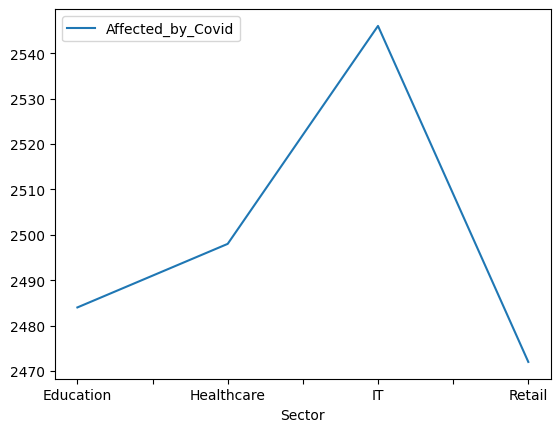

In [8]:
df_sector = df[['Sector', 'Affected_by_Covid']].groupby(['Sector']).sum()
df_sector.reset_index().plot(x='Sector', y='Affected_by_Covid')
plt.show()